In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

uploads = files.upload()



Saving BRCA Data.csv to BRCA Data (5).csv


In [3]:
df = pd.read_csv('BRCA Data.csv')

In [4]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [5]:
df.isnull().sum()

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [8]:
Patient_Status = df['Patient_Status'].value_counts()
transactions = Patient_Status.index
quantity = Patient_Status.values

figure = px.pie(df,
             values=quantity,
             names=transactions, hole =.60,
             title="Patient Status")
figure.show()

In [9]:
import plotly.express as px

def generate_pie_chart(df, column_name):
    column_counts = df[column_name].value_counts()
    transactions = column_counts.index
    quantity = column_counts.values

    fig = px.pie(df, values=quantity, names=transactions, hole=0.6, title=f"{column_name} Distribution")
    fig.show()


In [10]:
generate_pie_chart(df,'Tumour_Stage')

In [11]:
df.drop(['Date_of_Surgery','Date_of_Last_Visit'],axis=1,inplace=True)

In [12]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


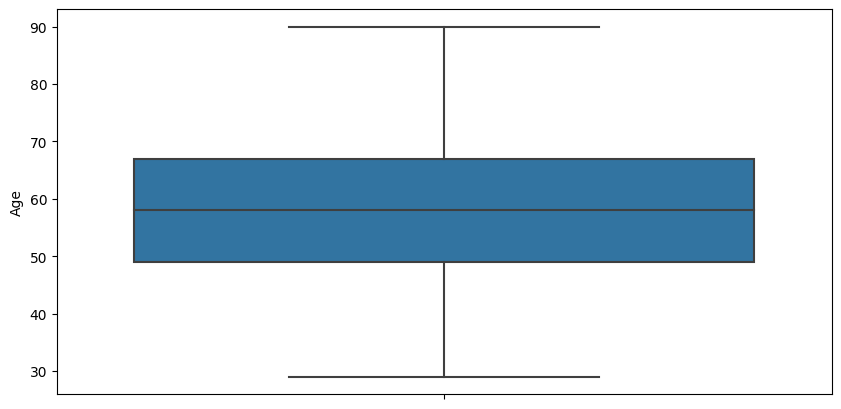

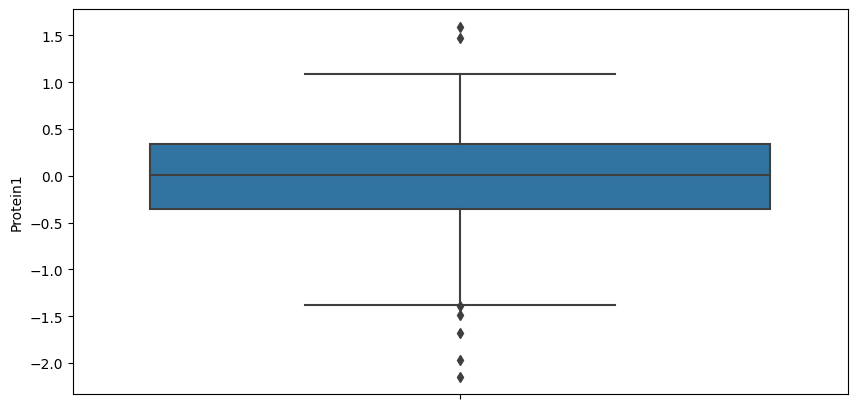

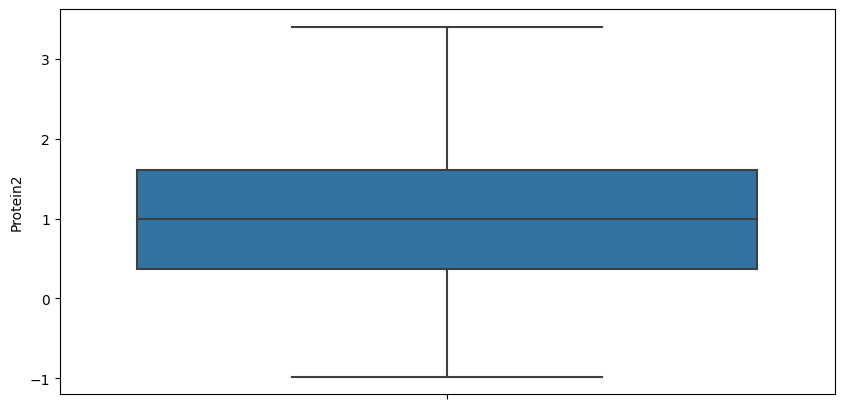

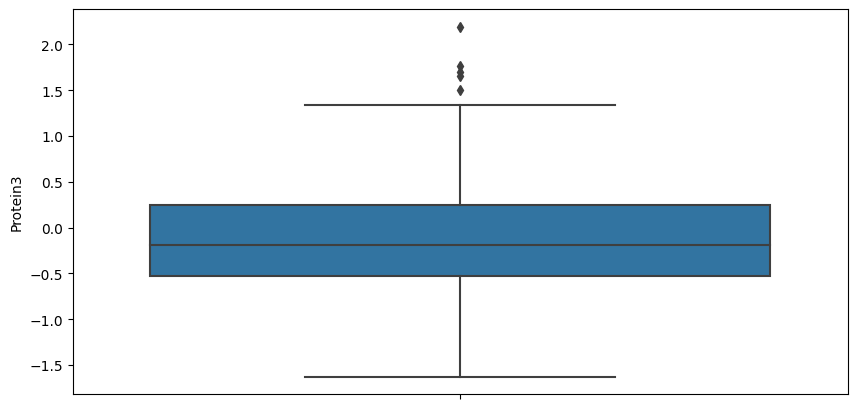

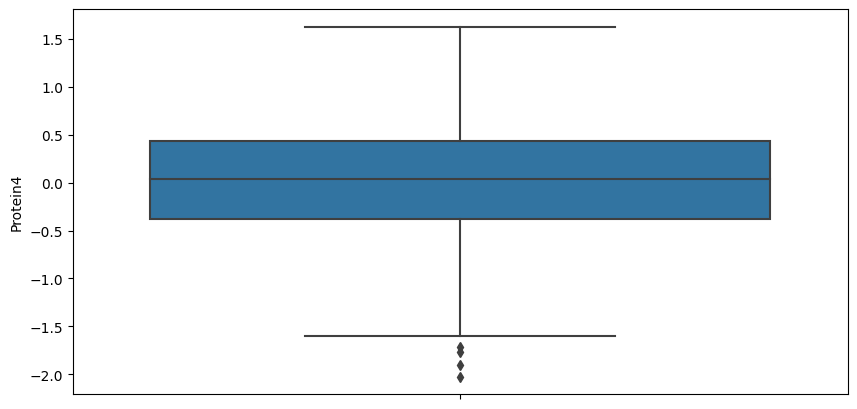

In [13]:
for i in ['Age','Protein1','Protein2','Protein3','Protein4']:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = df[i])
  plt.show()

In [14]:

from pycaret.classification import setup

In [15]:
import sys
!{sys.executable} -m pip install mlflow


In [16]:
cancer = setup(data = df, target = 'Patient_Status',
                  normalize = True,
                  transformation = True,
                  log_experiment = True,
                  remove_multicollinearity = True, #Drop one of the two features that are highly correlated with each other
                  numeric_imputation='median',
                  fold = 5,
                  #ignore_features=['Patient_ID'],
                  #date_features=['Date_of_Surgery','Date_of_Last_Visit'],
                  #fix_imbalance = False,
                  train_size = 0.70
          )

,Description,Value
0,Session id,6020
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(317, 14)"
5,Transformed data shape,"(317, 21)"
6,Transformed train set shape,"(221, 21)"
7,Transformed test set shape,"(96, 21)"
8,Ordinal features,2
9,Numeric features,5


In [17]:
from pycaret.classification import create_model

rf =create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2000,0.3503,1.0000,0.2000,0.3333,0.0000,0.0000
1,0.1818,0.3212,1.0000,0.1818,0.3077,0.0000,0.0000
2,0.1818,0.5851,1.0000,0.1818,0.3077,0.0000,0.0000
3,0.2045,0.4730,1.0000,0.2045,0.3396,0.0000,0.0000
4,0.2045,0.7397,1.0000,0.2045,0.3396,0.0000,0.0000
Mean,0.1945,0.4939,1.0000,0.1945,0.3256,0.0000,0.0000
Std,0.0105,0.1547,0.0000,0.0105,0.0148,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:

from pycaret.classification import compare_models

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8055,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2760
dummy,Dummy Classifier,0.8055,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.3960
knn,K Neighbors Classifier,0.7652,0.6110,0.2361,0.3800,0.2831,0.1521,0.1629,1.0100
svm,SVM - Linear Kernel,0.5295,0.0000,0.3944,0.1773,0.2325,-0.0284,-0.0380,0.5480
et,Extra Trees Classifier,0.4982,0.5573,0.5833,0.2213,0.3144,0.0451,0.0533,0.4080
lr,Logistic Regression,0.3031,0.5518,0.7472,0.1824,0.2929,-0.0280,-0.0552,0.8040
nb,Naive Bayes,0.1945,0.4819,0.9528,0.1886,0.3148,-0.0146,-0.0814,0.9060
dt,Decision Tree Classifier,0.1945,0.5000,1.0000,0.1945,0.3256,0.0000,0.0000,0.5180
ridge,Ridge Classifier,0.1945,0.0000,1.0000,0.1945,0.3256,0.0000,0.0000,0.4520
rf,Random Forest Classifier,0.1945,0.4939,1.0000,0.1945,0.3256,0.0000,0.0000,1.6200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [19]:
from pycaret.classification import predict_model


In [20]:
unseen_predictions = predict_model(rf, data = df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7571,0.9465,0.7571,0.8917,0.7820,0.4749,0.5580


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,0,Alive,0.95
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,1,Dead,0.81
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,0,Dead,0.86
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,0,Dead,0.82
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1,Dead,0.97


In [21]:
from pycaret.classification import save_model

In [22]:
save_model(rf,'rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max

In [23]:
from pycaret.classification import load_model
uploads = files.upload()
loaded_model = load_model('rf_model')


Saving rf_model.pkl to rf_model (5).pkl
Transformation Pipeline and Model Successfully Loaded


In [24]:

unseen_predictions2 = predict_model(loaded_model, data = df)
unseen_predictions2.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7571,0.9465,0.7571,0.8917,0.7820,0.4749,0.5580


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,0,Alive,0.95
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,1,Dead,0.81
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,0,Dead,0.86
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,0,Dead,0.82
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1,Dead,0.97


In [25]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(df.drop('Patient_Status', axis=1) , df[['Patient_Status']])

In [26]:
df2 = pd.concat([x_resampled,y_resampled],axis=1)
df2.shape

(510, 14)

In [27]:
df2.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead


In [28]:
df2.shape

(510, 14)

In [29]:
cancer2 = setup(data = df2, target = 'Patient_Status',
                  normalize = True,
                  transformation = True,
                  log_experiment = True,
                  remove_multicollinearity = True, #Drop one of the two features that are highly correlated with each other
                  numeric_imputation='median',
                  fold = 5,
                  #ignore_features=['Patient_ID'],
                  #date_features=['Date_of_Surgery','Date_of_Last_Visit'],
                  #fix_imbalance = False,
                  train_size = 0.70
          )

,Description,Value
0,Session id,549
1,Target,Patient_Status
2,Target type,Binary
3,Target mapping,"Alive: 0, Dead: 1"
4,Original data shape,"(510, 14)"
5,Transformed data shape,"(510, 21)"
6,Transformed train set shape,"(357, 21)"
7,Transformed test set shape,"(153, 21)"
8,Ordinal features,2
9,Numeric features,5


In [30]:
rf2 = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.9163,1.0000,0.5000,0.6667,0.0000,0.0000
1,0.5000,0.9846,1.0000,0.5000,0.6667,0.0000,0.0000
2,0.5070,0.9964,1.0000,0.5070,0.6729,0.0000,0.0000
3,0.5070,0.9635,1.0000,0.5070,0.6729,0.0000,0.0000
4,0.4930,0.9734,1.0000,0.4930,0.6604,0.0000,0.0000
Mean,0.5014,0.9668,1.0000,0.5014,0.6679,0.0000,0.0000
Std,0.0053,0.0276,0.0000,0.0053,0.0047,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9804,0.9804,0.9608,1.0000,0.9798,0.9609,0.9620,0.5060
lightgbm,Light Gradient Boosting Machine,0.9804,0.9834,0.9608,1.0000,0.9798,0.9609,0.9620,0.6460
lda,Linear Discriminant Analysis,0.9721,0.9785,0.9608,0.9836,0.9716,0.9441,0.9451,0.2580
ridge,Ridge Classifier,0.9720,0.0000,0.9608,0.9830,0.9715,0.9440,0.9448,0.5000
lr,Logistic Regression,0.8879,0.9787,0.9663,0.8367,0.8966,0.7759,0.7859,0.2740
et,Extra Trees Classifier,0.8348,0.9774,0.9663,0.7825,0.8593,0.6687,0.7031,0.4820
knn,K Neighbors Classifier,0.7536,0.8697,0.8884,0.7030,0.7826,0.5065,0.5342,0.2800
svm,SVM - Linear Kernel,0.7202,0.0000,1.0000,0.6493,0.7850,0.4395,0.5298,0.5100
nb,Naive Bayes,0.5014,0.5000,1.0000,0.5014,0.6679,0.0000,0.0000,0.4540
dt,Decision Tree Classifier,0.5014,0.5000,1.0000,0.5014,0.6679,0.0000,0.0000,0.4860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [36]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.9491,0.9167,0.9167,0.9167,0.8333,0.8333
1,0.7361,0.9950,1.0000,0.6545,0.7912,0.4722,0.5560
2,0.8732,1.0000,1.0000,0.8000,0.8889,0.7455,0.7709
3,0.7465,0.9742,0.9722,0.6731,0.7955,0.4896,0.5494
4,0.9014,0.9687,0.9429,0.8684,0.9041,0.8030,0.8059
Mean,0.8348,0.9774,0.9663,0.7825,0.8593,0.6687,0.7031
Std,0.0777,0.0185,0.0326,0.1040,0.0546,0.1560,0.1244


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
from pycaret.classification.functional import evaluate_model
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

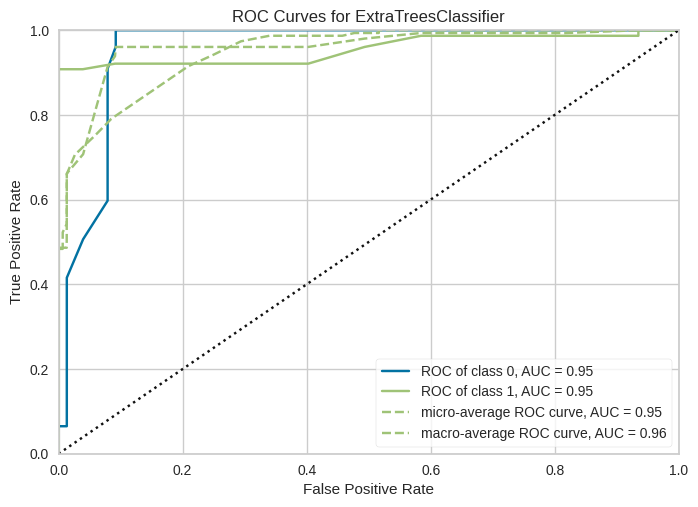

In [38]:
from pycaret.classification import plot_model
plot_model(et, plot='auc')

In [39]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9583,0.9583,0.9167,1.0000,0.9565,0.9167,0.9199
1,0.9861,0.9861,0.9722,1.0000,0.9859,0.9722,0.9726
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9859,0.9861,0.9722,1.0000,0.9859,0.9718,0.9722
4,0.9718,0.9714,0.9429,1.0000,0.9706,0.9436,0.9451
Mean,0.9804,0.9804,0.9608,1.0000,0.9798,0.9609,0.9620
Std,0.0142,0.0143,0.0285,0.0000,0.0149,0.0284,0.0273


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

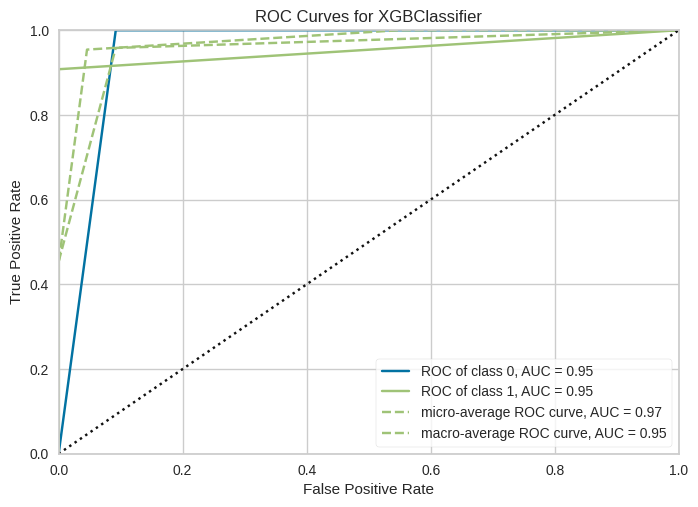

In [42]:
from pycaret.classification import plot_model
plot_model(xgboost, plot='auc')

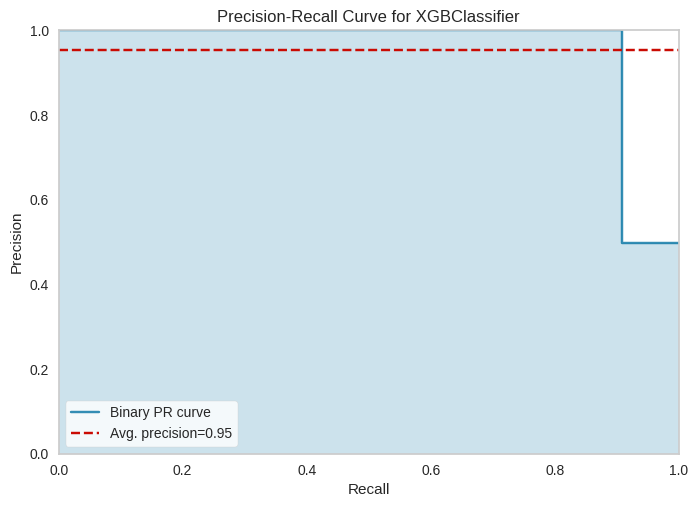

In [43]:
plot_model(xgboost, plot = 'pr')

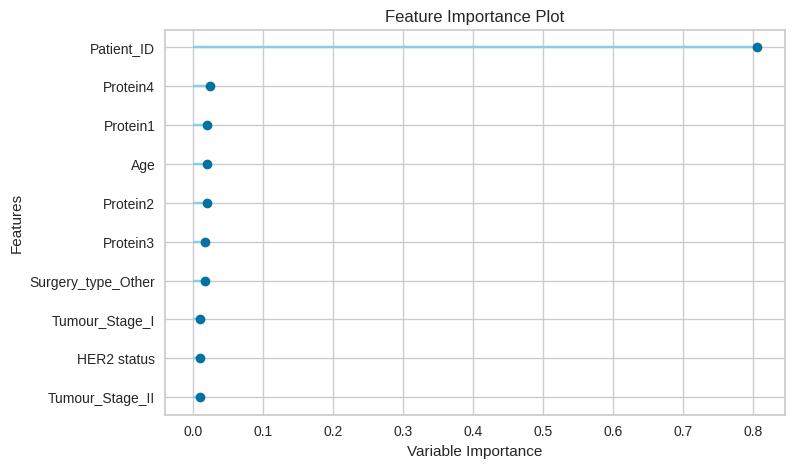

In [45]:
plot_model(et, plot='feature')

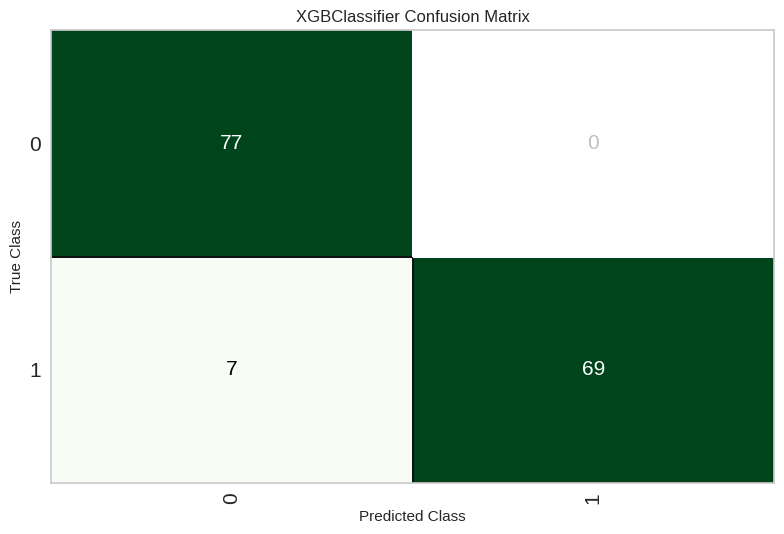

In [46]:
plot_model(xgboost, plot = 'confusion_matrix')

In [47]:
unseen_predictions = predict_model(xgboost, data = df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9874,0.9677,0.9874,0.9876,0.9872,0.9589,0.9597


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,0,Alive,0.9947
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,1,Dead,0.9947
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,0,Alive,0.9947
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,0,Alive,0.9947
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1,Dead,0.9947


In [48]:
save_model(xgboost, 'xgboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Protein1', 'Protein2',
                                              'Protein3', 'Protein4'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_featur...
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max_bin=None, max_cat_threshold=None,
    

In [50]:
uploads = files.upload()
loaded_mode1 = load_model('xgboost')

Saving xgboost.pkl to xgboost (2).pkl
Transformation Pipeline and Model Successfully Loaded


In [52]:
unseen_predictions = predict_model(loaded_mode1, data = df)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9874,0.9677,0.9874,0.9876,0.9872,0.9589,0.9597


,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,prediction_label,prediction_score
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,0,Alive,0.9947
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,1,Dead,0.9947
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,0,Alive,0.9947
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,0,Alive,0.9947
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,1,Dead,0.9947
